In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw_data/data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
df.shape

(170653, 19)

# Exploration / Outlier cleaning

In [4]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [5]:
# Keep only numerical features
df = df.select_dtypes(include=np.number)
df.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


In [6]:
# Get rid of categorical features and year
# To remove: Year, Explicit, Key, mode, popularity

df = df.drop(columns=['year', 'explicit', 'key', 'mode', 'popularity'])
df.head()

,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.0594,0.982,0.279,831667,0.211,0.878000,0.665,-20.096,0.0366,80.954
1,0.9630,0.732,0.819,180533,0.341,0.000000,0.160,-12.441,0.4150,60.936
2,0.0394,0.961,0.328,500062,0.166,0.913000,0.101,-14.850,0.0339,110.339
3,0.1650,0.967,0.275,210000,0.309,0.000028,0.381,-9.316,0.0354,100.109
4,0.2530,0.957,0.418,166693,0.193,0.000002,0.229,-10.096,0.0380,101.665


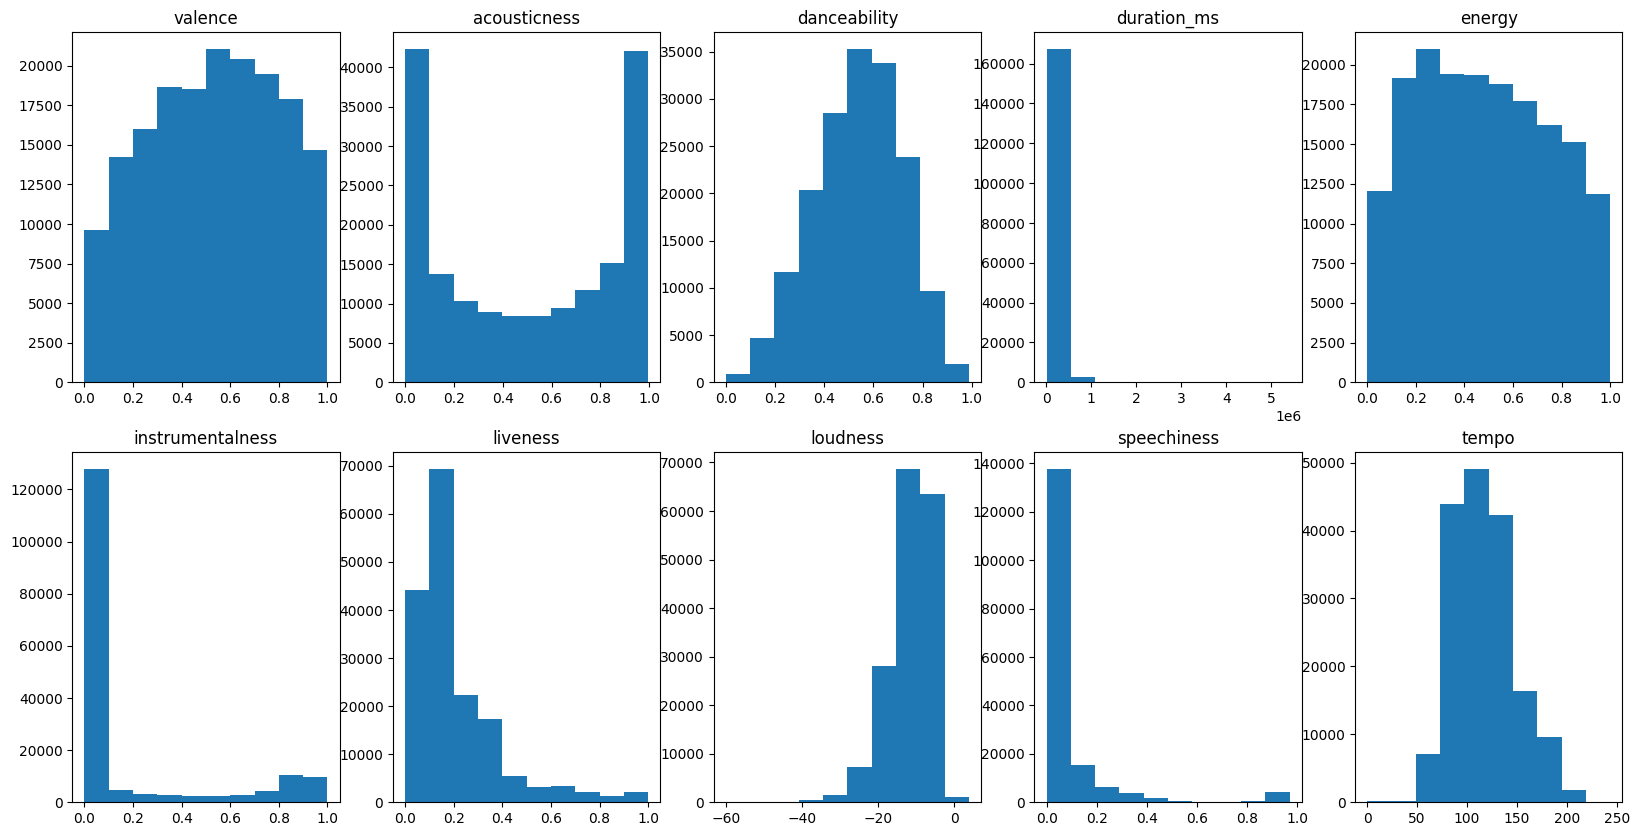

In [49]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for col, ax in zip(df.columns, axs.flatten()):
    ax.hist(df[col])
    ax.title.set_text(col)

In [54]:
# The distribution of both columns does not give opportunity for extracting meaningful information, in a first moment
df = df.drop(columns=['speechiness', 'instrumentalness'])

## Outliers

In [55]:
# By IQR method

q25, q75 = df.quantile(0.25), df.quantile(0.75)
iqr = q75 - q25

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [59]:
# 15% removal for our purpose is acceptable
df[(df > lower) & (df < upper)].dropna().shape[0] / df.shape[0]

0.8566799294474753

In [62]:
df = df[(df > lower) & (df < upper)].dropna()
df.shape

(146195, 8)

## MinMax scaling

In [63]:
df.head()

,valence,acousticness,danceability,duration_ms,energy,liveness,loudness,tempo
1,0.963,0.732,0.819,180533.0,0.341,0.160,-12.441,60.936
3,0.165,0.967,0.275,210000.0,0.309,0.381,-9.316,100.109
4,0.253,0.957,0.418,166693.0,0.193,0.229,-10.096,101.665
5,0.196,0.579,0.697,395076.0,0.346,0.130,-12.506,119.824
6,0.406,0.996,0.518,159507.0,0.203,0.115,-10.589,66.221


In [65]:
df.min(), df.max()

(valence             0.00000
 acousticness        0.00000
 danceability        0.05690
 duration_ms     31107.00000
 energy              0.00024
 liveness            0.00967
 loudness          -25.76200
 tempo              30.94600
 dtype: float64,
 valence              1.000
 acousticness         0.996
 danceability         0.988
 duration_ms     401253.000
 energy               1.000
 liveness             0.504
 loudness             3.744
 tempo              198.695
 dtype: float64)

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# feats with values < 0 and/or > 1
cols_to_norm = ['duration_ms', 'loudness', 'tempo']


pipe = ColumnTransformer([
    ('scaler', MinMaxScaler(), cols_to_norm)
], remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False)
pipe.set_output(transform='pandas')

df = pipe.fit_transform(df)

In [69]:
# Save preprocessing steps

df.to_csv('../data/clean_data/clean_data.csv', index=False)